In [36]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [28]:
df = pd.read_csv(r"comprar_alquilar.csv")
df.head()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1


In [29]:
df.describe()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,971.584158,211.742574,515.425743,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683
std,1682.862556,272.106351,124.940754,168.103075,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988
min,2008.000000,384.000000,0.000000,201.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000
25%,3513.750000,766.750000,99.000000,383.250000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000
50%,4947.500000,968.000000,208.500000,522.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000
75%,6374.500000,1165.250000,318.750000,656.750000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000
max,7984.000000,1585.000000,448.000000,828.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000


In [33]:
print(df.groupby('trabajo').size())

trabajo
0    16
1    18
2    18
3    21
4    19
5    31
6    23
7    27
8    29
dtype: int64


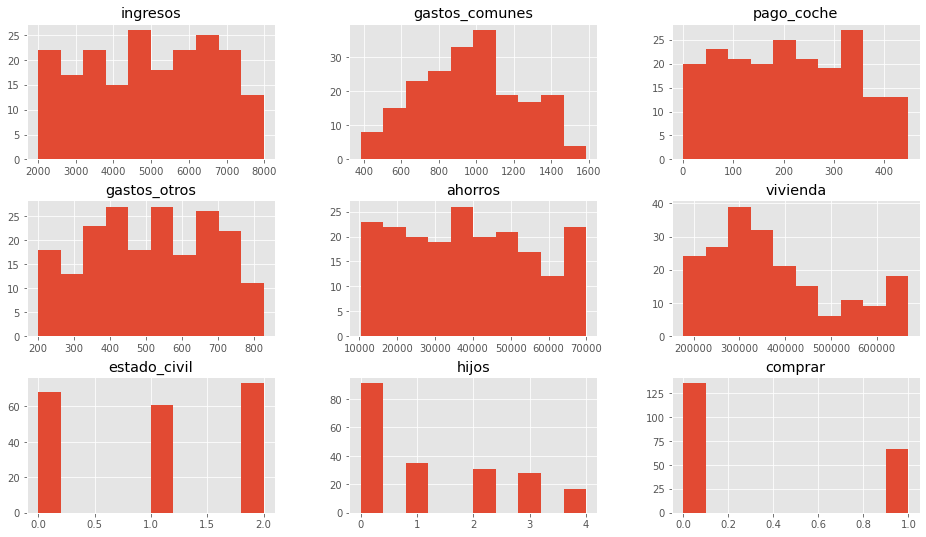

In [34]:
df.drop(['trabajo'],1).hist()
plt.show()

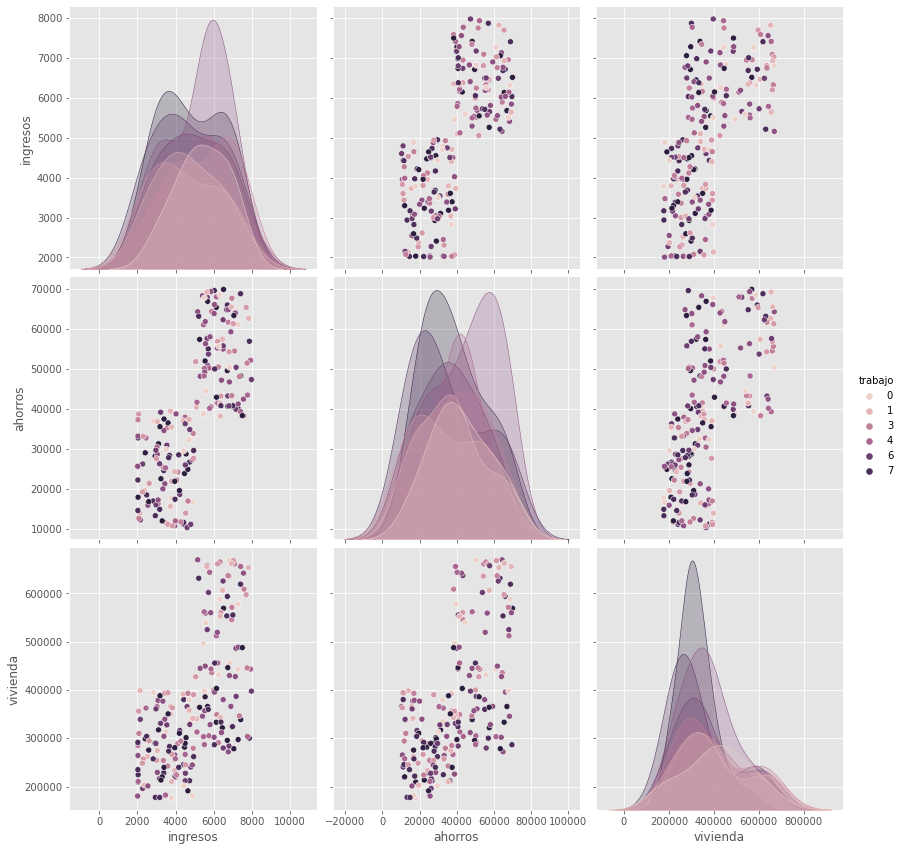

In [38]:
sb.pairplot(df.dropna(), hue='trabajo',height=4,vars=["ingresos","ahorros","vivienda"],kind='scatter')

In [39]:
X = np.array(df[["ingresos","ahorros","vivienda"]])
y = np.array(df['trabajo'])
X.shape

(202, 3)

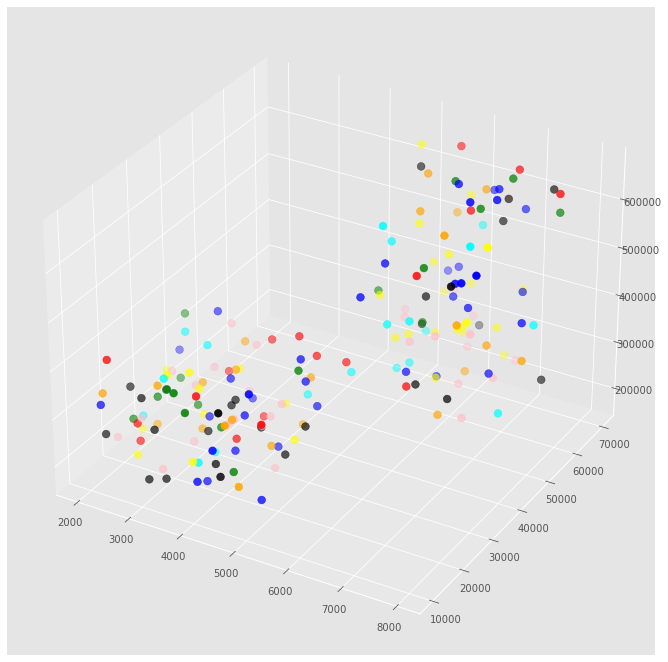

In [40]:
fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

D:\Ananconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


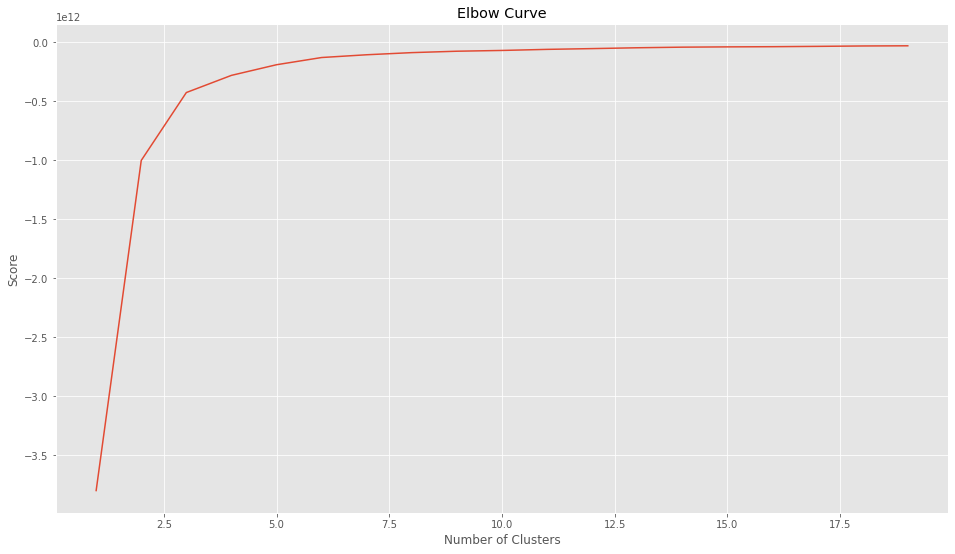

In [41]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[  5251.75342466  40556.69863014 384912.82191781]
 [  6478.14634146  55669.26829268 602517.19512195]
 [  4008.35227273  29367.65909091 256986.20454545]]


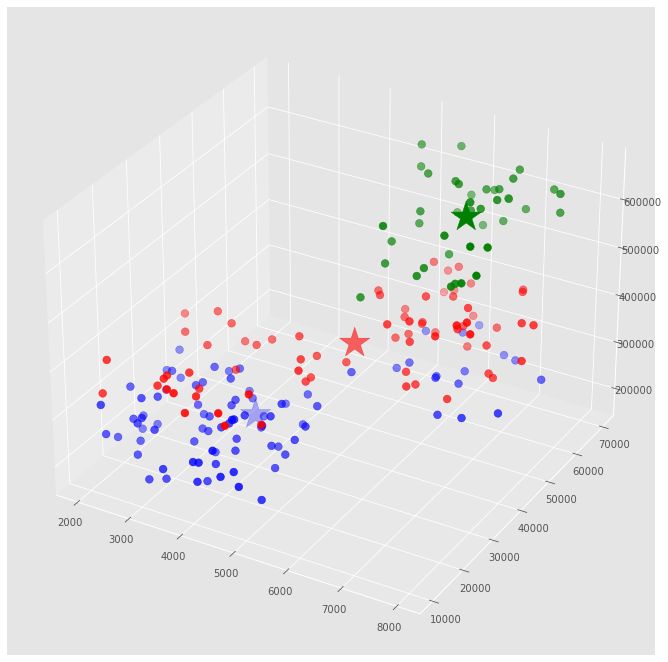

In [45]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red','green','blue']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [48]:
copy =  pd.DataFrame()
copy['trabajo']=df['trabajo'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,73
1,green,41
2,blue,88


In [54]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['trabajo']=[0,1,2,3,4,5,6,7,8]
diversidadGrupo['cantidad']=group_referrals.groupby('trabajo').size()
diversidadGrupo

,trabajo,cantidad
0,0,7
1,1,8
2,2,7
3,3,5
4,4,6
5,5,15
6,6,9
7,7,5
8,8,11


In [55]:
group_referrer_index = copy['label'] ==1
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['trabajo']=[0,1,2,3,4,5,6,7,8]
diversidadGrupo['cantidad']=group_referrals.groupby('trabajo').size()
diversidadGrupo

,trabajo,cantidad
0,0,5
1,1,5
2,2,5
3,3,6
4,4,4
5,5,5
6,6,5
7,7,5
8,8,1


In [56]:
group_referrer_index = copy['label'] ==2
group_referrals = copy[group_referrer_index]
 
diversidadGrupo =  pd.DataFrame()
diversidadGrupo['trabajo']=[0,1,2,3,4,5,6,7,8]
diversidadGrupo['cantidad']=group_referrals.groupby('trabajo').size()
diversidadGrupo

,trabajo,cantidad
0,0,4
1,1,5
2,2,6
3,3,10
4,4,9
5,5,11
6,6,9
7,7,17
8,8,17


In [57]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

NameError: name 'pairwise_distances_argmin_min' is not defined